In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings
import gsw

#=================================================
# Modify paths to point to output files
#=================================================
# Case name (Straight Coast)
case_straight = 'Straight Coast'

# path to ocean_annual file
path_year_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_straight = xr.open_dataset(path_year_straight, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_straight = xr.open_dataset(path_rho2_straight, decode_times=True)

# path to ocean_annual_z file
path_z_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_straight = xr.open_dataset(path_z_straight, decode_times=True)



# Case name (Both Coast)
case_both = 'Both Coast'

# path to ocean_annual file
path_year_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_both = xr.open_dataset(path_year_both, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_both = xr.open_dataset(path_rho2_both, decode_times=True)

# path to ocean_annual_z file
path_z_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_both = xr.open_dataset(path_z_both, decode_times=True)



# Case name (Wide Coast)
case_wide = 'Wide Coast'

# path to ocean_annual file
path_year_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_wide = xr.open_dataset(path_year_wide, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_wide = xr.open_dataset(path_rho2_wide, decode_times=True)

# path to ocean_annual_z file
path_z_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_wide = xr.open_dataset(path_z_wide, decode_times=True)



# Case name (America Coast)
case_am = 'America Coast'

# path to ocean_annual file
path_year_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_am = xr.open_dataset(path_year_am, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_am = xr.open_dataset(path_rho2_am, decode_times=True)

# path to ocean_annual_z file
path_z_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_am = xr.open_dataset(path_z_am, decode_times=True)



# Case name (Africa Coast)
case_af = 'Africa Coast'

# path to ocean_annual file
path_year_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_af = xr.open_dataset(path_year_af, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_af = xr.open_dataset(path_rho2_af, decode_times=True)

# path to ocean_annual_z file
path_z_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_af = xr.open_dataset(path_z_af, decode_times=True)



#=================================================
# Ignore runtime warnings: mean of empty slice
#=================================================
warnings.filterwarnings("ignore", message="Mean of empty slice")

#=================================================
# Modify latitudes to point to western and eastern
# boundaries of small basin and northern extent of SO.
# Comment out for AQUA and RIDGE cases. 
#=================================================
x_west = np.where(dy_straight['xh']==211)[0][0]
x_east = np.where(dy_straight['xh']==351)[0][0]
y = np.where(dy_straight['yq']==-35)[0][0]
y_south = np.where(dy_straight['yq']==-71)[0][0]
y_north = np.where(dy_straight['yq']==71)[0][0]

/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [2]:
def salinity_strat(dataset, case):
    s_diff = (dataset['so'].isel(time=slice(-361,-1)).sel(zl=500, method='nearest') 
              - dataset['so'].isel(time=slice(-361,-1)).sel(zl=0, method='nearest'))
    s_diff_djf = np.nanmean(s_diff.where(dataset['time.season'] == 'DJF'), axis=0)
    s_diff_jja = np.nanmean(s_diff.where(dataset['time.season'] == 'JJA'), axis=0)

    b = np.linspace(-3, 3, 21, endpoint=True)
    t = np.linspace(-3, 3, 11, endpoint=True)
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
    plt.contourf(dataset['xh'], dataset['yh'], s_diff.mean(dim='time'), 
                 b, cmap='BrBG_r', extend='both',  transform=ccrs.PlateCarree())
    cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
    cbar.ax.set_ylabel('[psu]', fontsize=14)
    plt.title('{} Mean Salinity Difference, 500m-0m'.format(case), fontsize=16)
#     plt.savefig(fig_path+'sdiff_mean.png')
    plt.show()

    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
    plt.contourf(dataset['xh'], dataset['yh'], s_diff_djf, 
                 b, cmap='BrBG_r', extend='both',  transform=ccrs.PlateCarree())
    cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
    cbar.ax.set_ylabel('[psu]', fontsize=14)
    plt.title('{} DJF Salinity Difference, 500m-0m'.format(case), fontsize=16)
#     plt.savefig(fig_path+'sdiff_DJF.png')
    plt.show()

    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
    plt.contourf(dataset['xh'], dataset['yh'], s_diff_jja, 
                 b, cmap='BrBG_r', extend='both',  transform=ccrs.PlateCarree())
    cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
    cbar.ax.set_ylabel('[psu]', fontsize=14)
    plt.title('{} JJA Salinity Difference, 500m-0m'.format(case), fontsize=16)
#     plt.savefig(fig_path+'sdiff_JJA.png')
    plt.show()
    return


# def density_strat(dataset, case):
    
#     salt = dataset.so.isel(time=slice(-361,-1)).mean(dim='time')
#     temp = dataset.thetao.isel(time=slice(-361,-1)).mean(dim='time')
    
#     CT_0 = xr.apply_ufunc(gsw.CT_from_pt, 
#                           salt.sel(zl=0,method='nearest'), temp.sel(zl=0,method='nearest'), 
#                           dask='parallelized', output_dtypes=[float,])
#     sigma_0 = xr.apply_ufunc(gsw.sigma0, 
#                              salt.sel(zl=0,method='nearest'), CT_0, 
#                              dask='parallelized', output_dtypes=[float,])
#     CT_500 = xr.apply_ufunc(gsw.CT_from_pt, 
#                             salt.sel(zl=500,method='nearest'), temp.sel(zl=500,method='nearest'), 
#                             dask='parallelized', output_dtypes=[float,])
#     sigma_500 = xr.apply_ufunc(gsw.sigma0, 
#                                salt.sel(zl=500,method='nearest'), CT_500, 
#                                dask='parallelized', output_dtypes=[float,])
    
#     rho_diff = sigma_500 - sigma_0

# #     rho_diff_djf = np.nanmean(s_diff.where(dataset['time.season'] == 'DJF'), axis=0)
# #     rho_diff_jja = np.nanmean(s_diff.where(dataset['time.season'] == 'JJA'), axis=0)

#     b = np.linspace(0, 3, 21, endpoint=True)
#     t = np.linspace(0, 3, 11, endpoint=True)
#     fig = plt.figure(figsize=(14, 6))
#     ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
#     plt.contourf(dataset['xh'], dataset['yh'], rho_diff, 
#                  b, cmap='PuBu', extend='both',  transform=ccrs.PlateCarree())
#     cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
#     cbar.ax.set_ylabel('[kg m$^{-3}$]', fontsize=14)
#     plt.title('{} Mean Density Difference, 500m-0m'.format(case), fontsize=16)
# #     plt.savefig(fig_path+'sdiff_mean.png')
#     plt.show()

#     fig = plt.figure(figsize=(14, 6))
#     ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
#     plt.contourf(dataset['xh'], dataset['yh'], rho_diff_djf, 
#                  b, cmap='BrBG_r', extend='both',  transform=ccrs.PlateCarree())
#     cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
#     cbar.ax.set_ylabel('[kg m$^{-3}$]', fontsize=14)
#     plt.title('{} DJF Density Difference, 500m-0m'.format(case), fontsize=16)
# #     plt.savefig(fig_path+'sdiff_DJF.png')
#     plt.show()

#     fig = plt.figure(figsize=(14, 6))
#     ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
#     plt.contourf(dataset['xh'], dataset['yh'], rho_diff_jja, 
#                  b, cmap='BrBG_r', extend='both',  transform=ccrs.PlateCarree())
#     cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
#     cbar.ax.set_ylabel('[kg m$^{-3}$]', fontsize=14)
#     plt.title('{} JJA Density Difference, 500m-0m'.format(case), fontsize=16)
# #     plt.savefig(fig_path+'sdiff_JJA.png')
#     plt.show()
    return


def salinity_strat_diff(dataset1, dataset2, case1, case2):
    s_diff1 = (dataset1['so'].isel(time=slice(-361,-1)).sel(zl=500, method='nearest').mean(dim='time')
              - dataset1['so'].isel(time=slice(-361,-1)).sel(zl=0, method='nearest').mean(dim='time'))
    s_diff2 = (dataset2['so'].isel(time=slice(-361,-1)).sel(zl=500, method='nearest').mean(dim='time') 
              - dataset2['so'].isel(time=slice(-361,-1)).sel(zl=0, method='nearest').mean(dim='time'))
    s_diff = s_diff1 - s_diff2
    
    mask = np.zeros(s_diff1.shape, dtype=bool)
    mask = np.where(~np.isnan(s_diff1), mask, 1)
#     s_diff_djf = np.nanmean(s_diff.where(dataset1['time.season'] == 'DJF'), axis=0)
#     s_diff_jja = np.nanmean(s_diff.where(dataset1['time.season'] == 'JJA'), axis=0)
    
    b = np.linspace(-1, 1, 21, endpoint=True)
    t = np.linspace(-1, 1, 11, endpoint=True)
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
    plt.contourf(dataset1.xh, dataset1.yh, s_diff,  b,
                 cmap='BrBG_r', extend='both',  transform=ccrs.PlateCarree())
    cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
    cbar.ax.set_ylabel('[psu]', fontsize=14)
    plt.contour(dataset2['xh'], dataset2['yh'], mask, [0.01], colors='gray', transform=ccrs.PlateCarree())
    plt.title('{}-{} Mean Salinity Difference, 500m-0m'.format(case1, case2), fontsize=16)
#     plt.savefig(fig_path+'sdiff_mean.png')
    plt.show()

#     fig = plt.figure(figsize=(14, 6))
#     ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
#     plt.contourf(dataset1['xh'], dataset1['yh'], s_diff_djf, 
#                  b, cmap='BrBG_r', extend='both',  transform=ccrs.PlateCarree())
#     cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
#     cbar.ax.set_ylabel('[psu]', fontsize=14)
#     plt.title('{} DJF Salinity Difference, 500m-0m'.format(case), fontsize=16)
# #     plt.savefig(fig_path+'sdiff_DJF.png')
#     plt.show()

#     fig = plt.figure(figsize=(14, 6))
#     ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
#     plt.contourf(dataset1['xh'], dataset1['yh'], s_diff_jja, 
#                  b, cmap='BrBG_r', extend='both',  transform=ccrs.PlateCarree())
#     cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
#     cbar.ax.set_ylabel('[psu]', fontsize=14)
#     plt.title('{} JJA Salinity Difference, 500m-0m'.format(case), fontsize=16)
# #     plt.savefig(fig_path+'sdiff_JJA.png')
#     plt.show()
    return


In [8]:
def calc_density_wright(salt, temp, press=2000):
    '''Wright EOS density calculation. Default reference pressure is 2000db, but can be set to any pressure.'''

    p = press*10000
    
    a0 = 7.057924e-4
    a1 = 3.480336e-7
    a2 = -1.112733e-7

    b0 = 5.790749e8
    b1 = 3.516535e6
    b2 = -4.002714e4
    b3 = 2.084372e2
    b4 = 5.944068e5
    b5 = -9.643486e3

    c0 = 1.704853e5
    c1 = 7.904722e2
    c2 = -7.984422
    c3 = 5.140652e-2
    c4 = -2.302158e2
    c5 = -3.079464

    alpha_0 = a0 + a1*temp + a2*salt
    p_0 = b0 + b1*temp + b2*temp**2 + b3*temp**3 + b4*salt + b5*salt*temp
    lam = c0 + c1*temp + c2*temp**2 + c3*temp**3 + c4*salt + c5*salt*temp

    denom = 1 / (lam + alpha_0*(p+p_0))
    denom2 = denom * denom
    
    rho = (p+p_0) * denom
    
    drho_dT = denom2 * (lam * (b1 + temp*(2.0*b2 + 3.0*b3*temp) + b5*salt) - 
                    (p+p_0) * ((p+p_0)*a1 + (c1 + temp*(c2*2.0 + c3*3.0*temp + c5*salt)) ))

    drho_dS = denom2 * (lam * (b4 + b5*temp) - (p+p_0) * ((p+p_0)*a2 + (c4 + c5*temp)))
    
    rho_xarray = temp.copy()
    rho_xarray.attrs['units'] = 'kg/m^3' 
    rho_xarray.attrs['long_name'] = 'potential density referenced to 2000 dbar'
    rho_xarray.attrs['standard_name'] = 'sigma2'
    rho_xarray.values = rho
    
    return rho_xarray


def density_strat(dataset, case):
    
    salt = dataset.so.isel(time=slice(-31,-1)).mean(dim='time')
    temp = dataset.thetao.isel(time=slice(-31,-1)).mean(dim='time')
    
    rho = calc_density_wright(salt, temp)

    rho_diff = rho.sel(zl=1000, method='nearest') - rho.sel(zl=0, method='nearest')

    b = np.linspace(0, 6, 21, endpoint=True)
    t = np.linspace(0, 6, 11, endpoint=True)
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
    plt.contourf(dataset['xh'], dataset['yh'], rho_diff, 
                 b, cmap='PuBu', extend='both',  transform=ccrs.PlateCarree())
    cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
    cbar.ax.set_ylabel('[kg m$^{-3}$]', fontsize=14)
    plt.title(r'{} $\Delta \rho_z$'.format(case), fontsize=16)
#     plt.savefig(fig_path+'sdiff_mean.png')
    plt.show()
        
    fig = plt.figure(figsize=(3, 6))
    plt.plot(rho_diff.isel(xh=slice(x_west,x_east)).mean(dim='xh'), dataset['yh'], linewidth=3)
    plt.plot([0,0], [-90,90], linestyle='dashed', color='gray')
    plt.plot([-5,10], [0,0], linestyle='dashed', color='gray')
    plt.ylim([-32,70]), plt.xlim([-0.2,7.4])
    plt.xlabel('[kg m$^{-3}$]', fontsize=14), plt.ylabel('Latitude', fontsize=14)
    plt.show()
    
    return

    
def density_strat_diff(dataset1, dataset2, case1, case2):
    
    salt1 = dataset1.so.isel(time=slice(-31,-1)).mean(dim='time')
    temp1 = dataset1.thetao.isel(time=slice(-31,-1)).mean(dim='time')
    
    rho1 = calc_density_wright(salt1, temp1)

    rho_diff1 = rho1.sel(zl=1000, method='nearest') - rho1.sel(zl=0, method='nearest')
    
    salt2 = dataset2.so.isel(time=slice(-31,-1)).mean(dim='time')
    temp2 = dataset2.thetao.isel(time=slice(-31,-1)).mean(dim='time')
    
    rho2 = calc_density_wright(salt2, temp2)

    rho_diff2 = rho2.sel(zl=1000, method='nearest') - rho2.sel(zl=0, method='nearest')
    
    rho_diff = rho_diff1 - rho_diff2
    
    mask = np.zeros(rho_diff1.shape, dtype=bool)
    mask = np.where(~np.isnan(rho_diff1), mask, 1)

#     rho_diff_djf = np.nanmean(s_diff.where(dataset['time.season'] == 'DJF'), axis=0)
#     rho_diff_jja = np.nanmean(s_diff.where(dataset['time.season'] == 'JJA'), axis=0)

    b = np.linspace(-1.5, 1.5, 21, endpoint=True)
    t = np.linspace(-1.5, 1.5, 11, endpoint=True)
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
    plt.contourf(dataset1['xh'], dataset1['yh'], rho_diff, 
                 b, cmap='RdBu_r', extend='both',  transform=ccrs.PlateCarree())
    cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
    cbar.ax.set_ylabel('[kg m$^{-3}$]', fontsize=14)
    plt.title(r'{} - {} $\Delta \rho_z$'.format(case1, case2), fontsize=16)
    plt.contour(dataset1['xh'], dataset1['yh'], mask, [0.01], colors='gray', transform=ccrs.PlateCarree())
#     plt.savefig(fig_path+'sdiff_mean.png')
    plt.show()
        
    fig = plt.figure(figsize=(3, 6))
    plt.plot(rho_diff.isel(xh=slice(x_west,x_east)).mean(dim='xh'), dataset1['yh'], linewidth=3)
    plt.plot([0,0], [-90,90], linestyle='dashed', color='gray')
    plt.plot([-5,5], [0,0], linestyle='dashed', color='gray')
    plt.ylim([-35,70]), plt.xlim([-0.5,0.5])
    plt.xlabel('[kg m$^{-3}$]', fontsize=14), plt.ylabel('Latitude', fontsize=14)
    plt.show()
    
    return

In [9]:
# salinity_strat(dm_straight, case_straight)
# salinity_strat(dm_both, case_both)
# salinity_strat(dm_wide, case_wide)
# salinity_strat(dm_am, case_am)
# salinity_strat(dm_af, case_af)

In [10]:
# salinity_strat_diff(dm_both, dm_straight, case_both, case_straight)
# salinity_strat_diff(dm_wide, dm_straight, case_wide, case_straight)
# salinity_strat_diff(dm_am, dm_straight, case_am, case_straight)
# salinity_strat_diff(dm_af, dm_straight, case_af, case_straight)

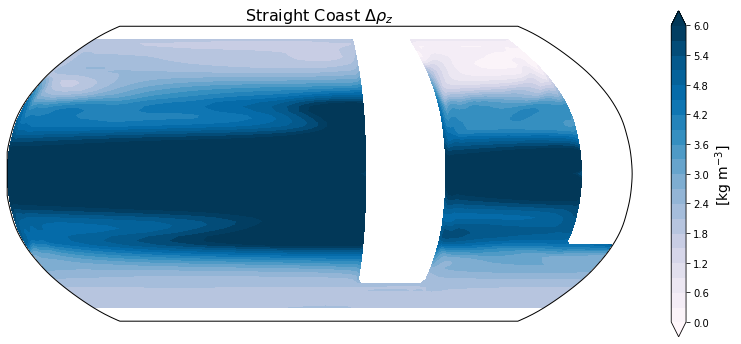

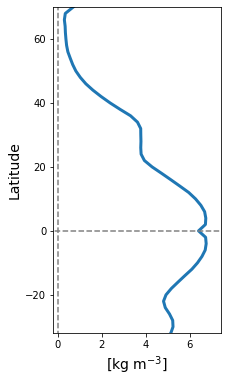

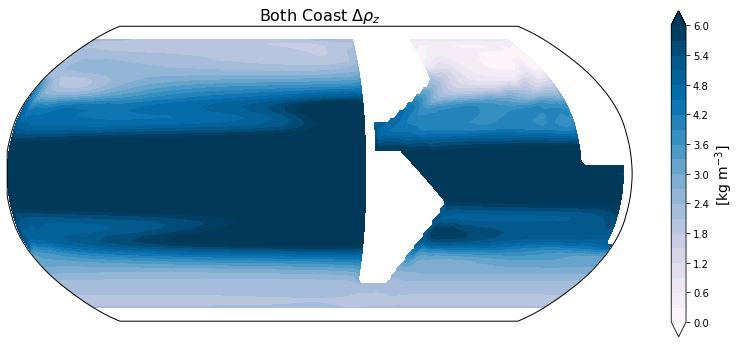

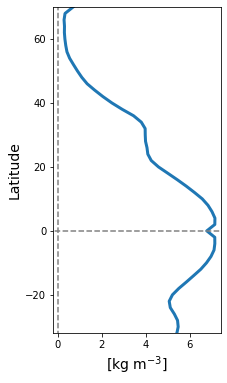

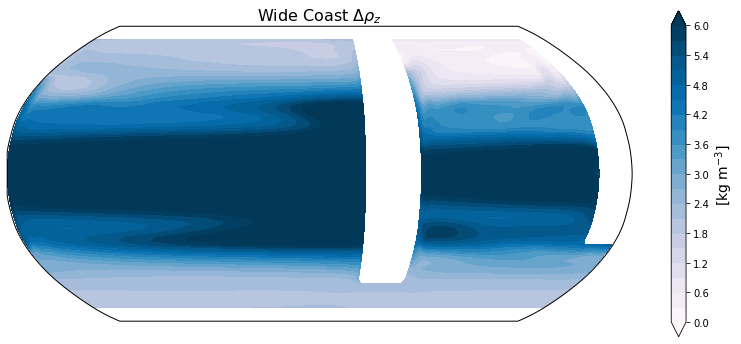

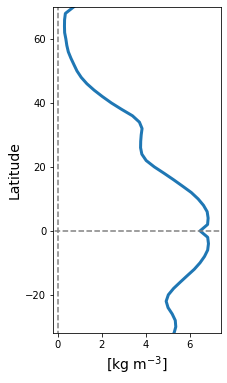

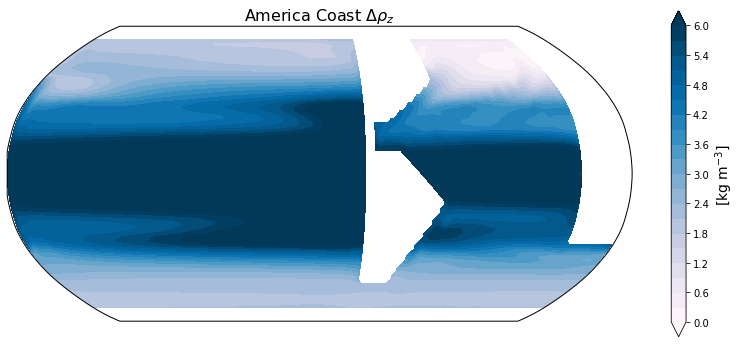

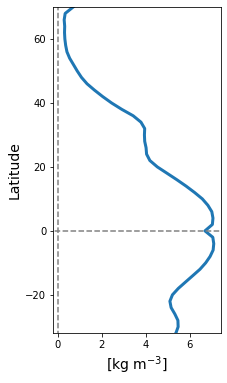

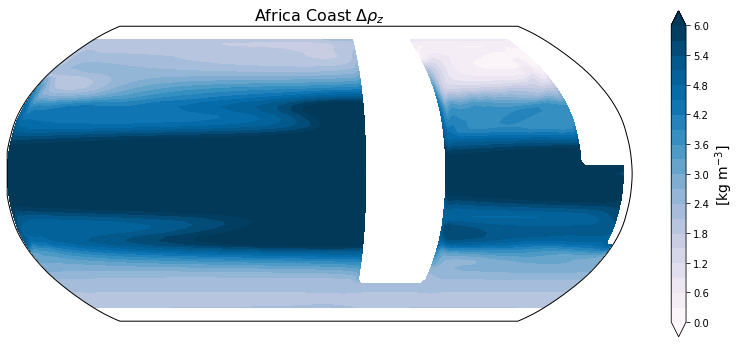

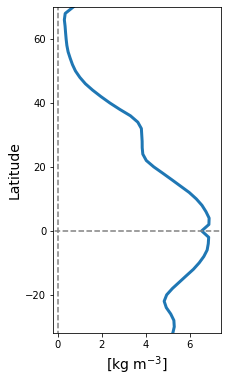

In [11]:
density_strat(dy_straight, case_straight)
density_strat(dy_both, case_both)
density_strat(dy_wide, case_wide)
density_strat(dy_am, case_am)
density_strat(dy_af, case_af)

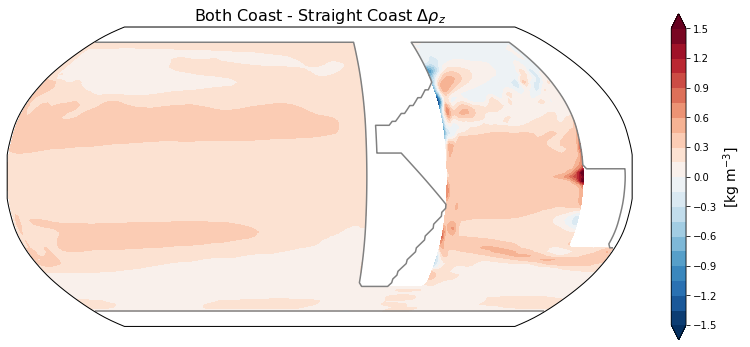

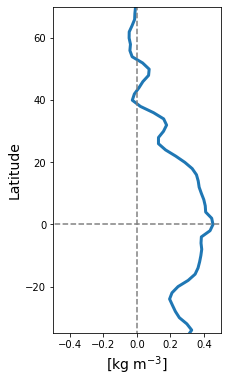

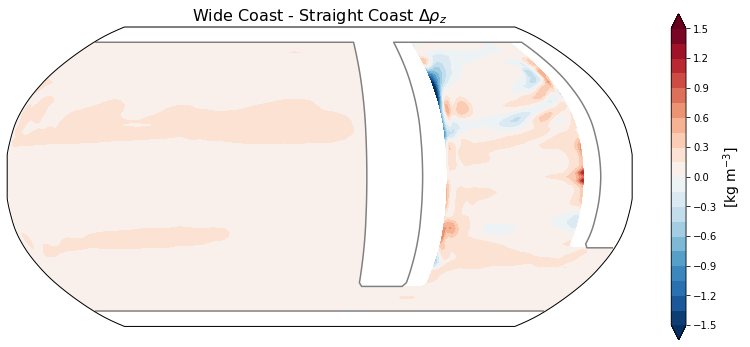

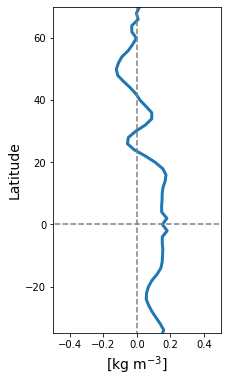

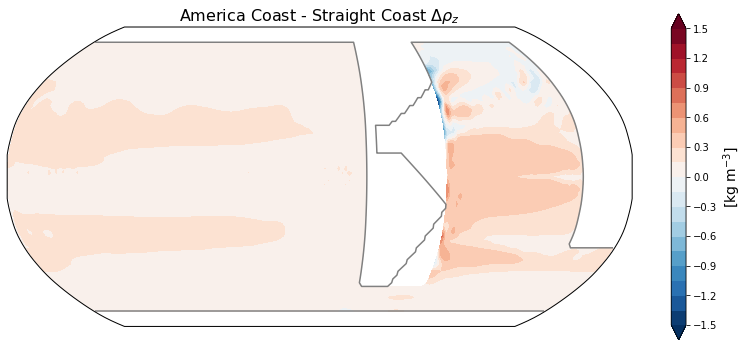

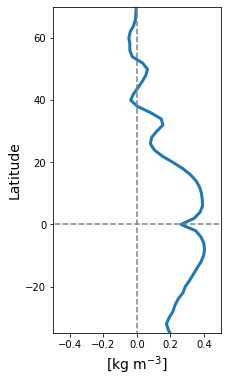

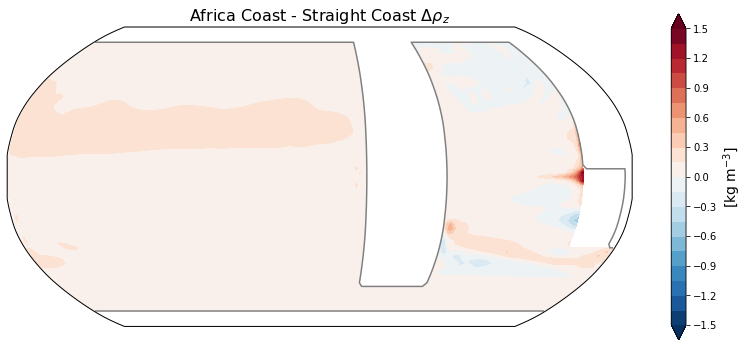

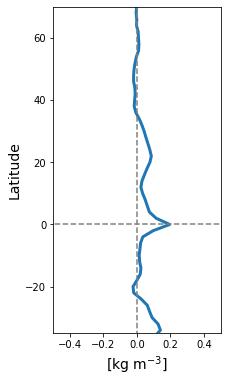

In [12]:
density_strat_diff(dy_both, dy_straight, case_both, case_straight)
density_strat_diff(dy_wide, dy_straight, case_wide, case_straight)
density_strat_diff(dy_am, dy_straight, case_am, case_straight)
density_strat_diff(dy_af, dy_straight, case_af, case_straight)

How much of the stratification is due to salinity? How much is due to temperature?